## Multi-layer coated mirror
A single mirror with multi-layer coating is illustrated here. The reflection and transmission coefficients for s- and p- polarized components are cross-checked with the analysis from `ZEMAX` Optical Studio program.

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
sys.path.append('..')
from PyAstroPol import *
roundOffDisplay(5)

In [2]:
S = Source(100, Clear=100)                                  # Source for ray analysis
Sd = Source(20, Clear=100)                                  # Source for ray analysis
S.Wavelength = 0.633
Sd.Wavelength = 0.633
C = Coating([2.16-7.18j, 1.67, 1.2, 1.67, 1.2], 
            [0.100, 0.100, 0.100, 0.100, 0.100])            # Define coating
#
M1 = Surface(200, Mirror=True, n2=2.16-7.18j)               # Mirror substrate
M1.rotateAboutX(45)                                         # Fold the mirror
M1.translateOrigin(z=1000)                                  # Move the mirror
M1.Coating = C                                              # Apply coating to M1
#
D = Detector(100)
D.rotateAboutX(90)                                          # Rotate the detector
D.translateOrigin(y=1000, z=1000)                           # Move the detector

In [3]:
Sys = System(S, [M1], D, dRays=Sd)                          # Complete optical system
Sys.propagateRays()                                         # Propagate rays through system

C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: invalid value encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: divide by zero encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: divide by zero encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np

C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: invalid value encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: divide by zero encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: divide by zero encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np

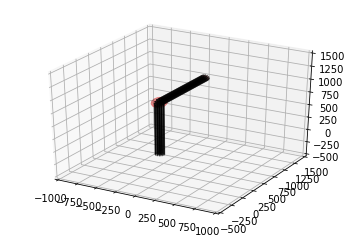

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                # Draw optical system
adjustAspect(Ax, 2000, y=500, z=500)                        # Adjust 3D space 
plt.show()

In [5]:
MM, Tra = Sys.getSystemMuellerMatrix()                      # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000 -0.07754  0.00000  0.00000]
 [-0.07754  1.00000 -0.00000  0.00000]
 [ 0.00000 -0.00000 -0.88864  0.45200]
 [ 0.00000 -0.00000 -0.45200 -0.88864]]
Throughput is:  0.6051645828331274


C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
